<a href="https://colab.research.google.com/github/drpriyankasharma0305/prediction-of-disease-/blob/main/Article_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Article Recommendation System**

>>There are many ways to create recommendation systems. To create an articles recommendation system, we need to focus on content rather than user interest.

>>For example, if a user reads an article based on clustering, all recommended articles should also be based on clustering. So to recommend articles based on the content:
>>>●	we need to understand the content of the article

>>>●	match the content with all the other articles

>>>●	and recommend the most suitable articles for the article that the reader is already reading

For this task, we can use the concept of cosine similarity in machine learning. Cosine similarity is a method of building recommendation systems based on the content. It is used to find similarities between two different pieces of text documents. So we can use cosine similarity to build an article recommendation system. In the section below, I will take you through how to build an article recommendation system with machine learning using Python.

DataSet:- https://raw.githubusercontent.com/amankharwal/Website-data/master/articles.csv




#Importing Libraries

The code begins by importing the necessary libraries:

>**pandas:** Used for data manipulation and analysis.

>**numpy:** Provides mathematical functions and tools for working with arrays.

>**matplotlib.pyplot:** Used for creating visualizations and plots.

>**seaborn:** A data visualization library built on top of matplotlib, providing additional functionality and aesthetics.

>**sklearn.feature_extraction.text.TfidfVectorizer:** Used for converting a collection of raw documents into a matrix of TF-IDF features.

>**sklearn.metrics.pairwise.cosine_similarity:** Computes the cosine similarity between pairs of vectors.

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

#Loading dataset

The next step is to load the data from a CSV file into a pandas DataFrame. A DataFrame is a two-dimensional labeled data structure with columns of potentially different types

The data file contains articles on various topics along with their titles and categories. The data can be accessed from this URL: https://raw.githubusercontent.com/amankharwal/Website-data/master/articles.csv

The encoding parameter is set to ‘latin1’ to avoid any encoding errors while reading the file.

The data variable stores the DataFrame object.

In [ ]:
# Load the data
data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/articles.csv", encoding='latin1')
data

,Article,Title
0,Data analysis is the process of inspecting and...,Best Books to Learn Data Analysis
1,The performance of a machine learning algorith...,Assumptions of Machine Learning Algorithms
2,You must have seen the news divided into categ...,News Classification with Machine Learning
3,When there are only two classes in a classific...,Multiclass Classification Algorithms in Machin...
4,The Multinomial Naive Bayes is one of the vari...,Multinomial Naive Bayes in Machine Learning
5,You must have seen the news divided into categ...,News Classification with Machine Learning
6,Natural language processing or NLP is a subfie...,Best Books to Learn NLP
7,By using a third-party application or API to m...,Send Instagram Messages using Python
8,Twitter is one of the most popular social medi...,Pfizer Vaccine Sentiment Analysis using Python
9,The squid game is currently one of the most tr...,Squid Game Sentiment Analysis using Python


#Basic EDA

The next step is to explore the data and get some basic information about it.

The following methods are used:

>**head():** returns the first five rows of the DataFrame

>**shape:** returns the number of rows and columns of the DataFrame as a tuple

>**info():** returns a summary of the DataFrame, including the index dtype and column dtypes, non-null values and memory usage

>**describe():** returns descriptive statistics for the numerical columns of the DataFrame, such as count, mean, std, min, max, etc

In [ ]:
# Explore the data
print(data.head())

                                             Article  \
0  Data analysis is the process of inspecting and...   
1  The performance of a machine learning algorith...   
2  You must have seen the news divided into categ...   
3  When there are only two classes in a classific...   
4  The Multinomial Naive Bayes is one of the vari...   

                                               Title  
0                  Best Books to Learn Data Analysis  
1         Assumptions of Machine Learning Algorithms  
2          News Classification with Machine Learning  
3  Multiclass Classification Algorithms in Machin...  
4        Multinomial Naive Bayes in Machine Learning  


In [ ]:
print(data.shape)

(34, 2)


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Article  34 non-null     object
 1   Title    34 non-null     object
dtypes: object(2)
memory usage: 672.0+ bytes
None


In [ ]:
print(data.describe())

                                                  Article  \
count                                                  34   
unique                                                 33   
top     You must have seen the news divided into categ...   
freq                                                    2   

                                            Title  
count                                          34  
unique                                         33  
top     News Classification with Machine Learning  
freq                                            2  


#Data Visualization

**Plot the number of words per article**

The next step is to plot the distribution of the number of words per article using seaborn.

The following steps are performed:

>A new column named “word_count” is added to the DataFrame by applying a lambda function to the “Article” column. The lambda function splits each article into words and returns the length of the resulting list.

>A histogram plot is created using sns.histplot() function, which takes the “word_count” column as input and draws a frequency distribution of values

>A title is added to the plot using plt.title() function from matplotlib

>The plot is shown using plt.show() function from matplotlib

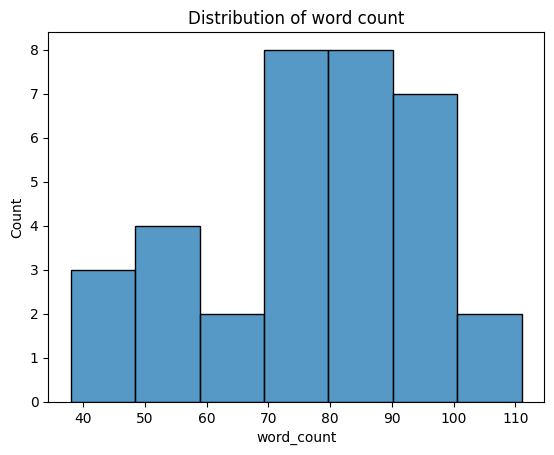

In [ ]:
# Plot the number of words per article
data["word_count"] = data["Article"].apply(lambda x: len(x.split()))
sns.histplot(data["word_count"])
plt.title("Distribution of word count")
plt.show()

**Plot the most frequent words in the articles**

The next step is to plot the most frequent words in the articles using sklearn and matplotlib.

The following steps are performed:

>A TfidfVectorizer object is created using sklearn.feature_extraction.text.TfidfVectorizer() function, which converts a collection of raw documents to a matrix of TF-IDF features. TF-IDF stands for term frequency-inverse document frequency, which is a numerical statistic that reflects how important a word is to a document in a collection or corpus. The vectorizer also removes stop words, which are common words that do not contribute much to the meaning of the text, such as “the”, “a”, “and”, etc

>The vectorizer is fitted and transformed on the “Article” column of the DataFrame using vectorizer.fit_transform() method, which returns a sparse matrix of TF-IDF features. The matrix is stored in X variable.

>The words corresponding to each feature are obtained using vectorizer.get_feature_names_out() method, which returns an array of feature names. The array is stored in words variable.

>The counts corresponding to each feature are obtained by summing up the values along each column of X matrix using X.sum(axis=0).A1 expression, which returns an array of counts. The array is stored in counts variable.

>A new DataFrame named freq_df is created using pd.DataFrame() function from pandas, which takes a dictionary of {“word”: words, “count”: counts} as input and creates two columns named “word” and “count”

>The DataFrame is sorted by “count” column in descending order using freq_df.sort_values() method, which returns a new sorted DataFrame. The top 10 rows are selected using .head(10) method

>A bar plot is created using .plot() method on the sorted DataFrame, which takes kind=“bar”, x=“word”, y=“count” as parameters and draws a bar chart with word on x-axis and count on y-axis

>A title, x-label and y-label are added to the plot using plt.title(), plt.xlabel() and plt.ylabel() functions from matplotlib respectively

>The plot is shown using plt.show() function from matplotlib

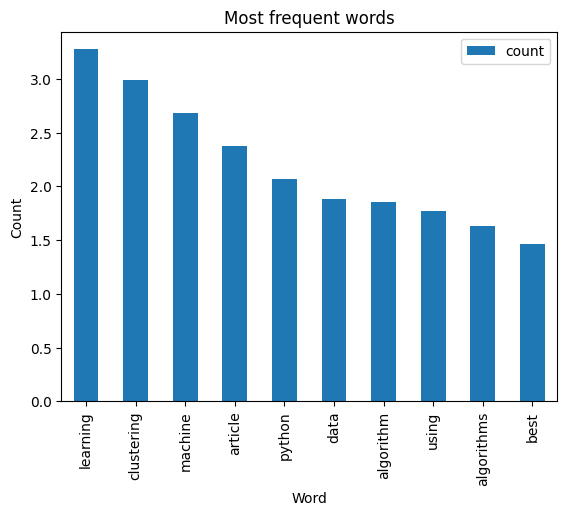

In [ ]:
# Plot the most frequent words in the articles
vectorizer = TfidfVectorizer(stop_words="english")
X = vectorizer.fit_transform(data["Article"])
words = vectorizer.get_feature_names_out()
counts = X.sum(axis=0).A1
freq_df = pd.DataFrame({"word": words, "count": counts})
freq_df.sort_values("count", ascending=False).head(10).plot(kind="bar", x="word", y="count")
plt.title("Most frequent words")
plt.xlabel("Word")
plt.ylabel("Count")
plt.show()

#TF_IDF cosine similarity matrix

**Compute the TF-IDF cosine similarity matrix**

The next step is to compute the TF-IDF cosine similarity matrix using sklearn.

Cosine similarity is a measure of similarity between two non-zero vectors of an inner product space that measures the cosine of the angle between them. It ranges from -1 (exactly opposite) to 1 (exactly same). It can be used to measure how similar two documents are based on their TF-IDF features.

The following steps are performed:

>The cosine similarity matrix is computed using sklearn.metrics.pairwise.cosine_similarity() function, which takes X matrix as input and returns an array of similarity scores between each pair of documents. The array is stored in similarity variable.

>The similarity matrix is printed.

In [ ]:
# Compute the TF-IDF cosine similarity matrix
similarity = cosine_similarity(X)
similarity

array([[1.        , 0.02858003, 0.02014231, ..., 0.12022323, 0.00455773,
        0.02511323],
       [0.02858003, 1.        , 0.07651482, ..., 0.30365338, 0.27795728,
        0.00383369],
       [0.02014231, 0.07651482, 1.        , ..., 0.08401534, 0.05252305,
        0.03233971],
       ...,
       [0.12022323, 0.30365338, 0.08401534, ..., 1.        , 0.12620279,
        0.04275628],
       [0.00455773, 0.27795728, 0.05252305, ..., 0.12620279, 1.        ,
        0.02113943],
       [0.02511323, 0.00383369, 0.03233971, ..., 0.04275628, 0.02113943,
        1.        ]])

#Similarity Scores

**Create a dataframe of similarity scores**

The next step is to create a dataframe of similarity scores using pandas.

The following steps are performed:

>A new DataFrame named similarity_df is created using pd.DataFrame() function from pandas, which takes similarity array as input and creates a square DataFrame with similarity scores as values

>The index and columns of the DataFrame are set to be the “Title” column of the original DataFrame using index=data[“Title”], columns=data[“Title”] parameters in pd.DataFrame() function. This way, each row and column represents an article title and each cell represents the similarity score between two articles.

>The similarity_df DataFrame is printed.

In [ ]:
# Create a dataframe of similarity scores
similarity_df = pd.DataFrame(similarity, index=data["Title"], columns=data["Title"])
similarity_df

Title,Best Books to Learn Data Analysis,Assumptions of Machine Learning Algorithms,News Classification with Machine Learning,Multiclass Classification Algorithms in Machine Learning,Multinomial Naive Bayes in Machine Learning,News Classification with Machine Learning,Best Books to Learn NLP,Send Instagram Messages using Python,Pfizer Vaccine Sentiment Analysis using Python,Squid Game Sentiment Analysis using Python,...,K-Means Clustering in Machine Learning,Animated Scatter Plot using Python,Tata Motors Stock Price Prediction with Machine Learning,Apple Stock Price Prediction with Machine Learning,Best Books to Learn Deep Learning,Applications of Deep Learning,Introduction to Recommendation Systems,Use Cases of Different Machine Learning Algorithms,Naive Bayes Algorithm in Machine Learning,Swap Items of a Python List
Title,,,,,,,,,,,,,,,,,,,,,
Best Books to Learn Data Analysis,1.000000,0.028580,0.020142,0.069628,0.035992,0.020142,0.120907,0.017070,0.115100,0.066351,...,0.005375,0.044862,0.023769,0.054422,0.212730,0.081118,0.124567,0.120223,0.004558,0.025113
Assumptions of Machine Learning Algorithms,0.028580,1.000000,0.076515,0.127136,0.142668,0.076515,0.037196,0.003724,0.041673,0.004522,...,0.150431,0.028685,0.029159,0.120319,0.230638,0.215260,0.002009,0.303653,0.277957,0.003834
News Classification with Machine Learning,0.020142,0.076515,1.000000,0.119498,0.044710,1.000000,0.019017,0.031923,0.049041,0.029638,...,0.041575,0.028389,0.049446,0.091754,0.084674,0.047078,0.060250,0.084015,0.052523,0.032340
Multiclass Classification Algorithms in Machine Learning,0.069628,0.127136,0.119498,1.000000,0.083755,0.119498,0.066647,0.008381,0.009690,0.010176,...,0.046050,0.012068,0.016672,0.061646,0.152366,0.110044,0.021177,0.171076,0.037325,0.031034
Multinomial Naive Bayes in Machine Learning,0.035992,0.142668,0.044710,0.083755,1.000000,0.044710,0.078555,0.015432,0.020023,0.010591,...,0.075088,0.037135,0.015243,0.051592,0.067931,0.068314,0.041370,0.125980,0.560122,0.015058
News Classification with Machine Learning,0.020142,0.076515,1.000000,0.119498,0.044710,1.000000,0.019017,0.031923,0.049041,0.029638,...,0.041575,0.028389,0.049446,0.091754,0.084674,0.047078,0.060250,0.084015,0.052523,0.032340
Best Books to Learn NLP,0.120907,0.037196,0.019017,0.066647,0.078555,0.019017,1.000000,0.005555,0.045036,0.040613,...,0.014410,0.014704,0.009293,0.042251,0.220647,0.108753,0.027306,0.034436,0.020051,0.005719
Send Instagram Messages using Python,0.017070,0.003724,0.031923,0.008381,0.015432,0.031923,0.005555,1.000000,0.025246,0.026511,...,0.068136,0.039696,0.019295,0.028999,0.017077,0.003724,0.022576,0.018158,0.021861,0.042788
Pfizer Vaccine Sentiment Analysis using Python,0.115100,0.041673,0.049041,0.009690,0.020023,0.049041,0.045036,0.025246,1.000000,0.248116,...,0.035887,0.035790,0.038158,0.065993,0.028216,0.023759,0.011452,0.060108,0.012489,0.031830


#Function for similar article

**Define a function to get the top n similar articles for a given article title**


The next step is to define a function that takes an article title and a number n as inputs and returns the top n similar articles based on cosine similarity scores.

The following steps are performed inside the function:

>Get the similarity scores for the given title by selecting its row from similarity_df DataFrame using similarity_df[Title] expression.

>Sort the scores in descending order using .sort_values(ascending=False) method on the scores series.

>Get the top n+1 titles by selecting them using .head(n+1) method on the sorted series.

>Return only similar articles except for itself by slicing them using [1:] expression on the series.

In [ ]:
# Define a function to get the top n similar articles for a given article title
def get_similar_articles(Title, n):
  # Get the similarity scores for the title
  scores = similarity_df[Title]
  # Sort the scores in descending order and get the top n titles
  similar_articles = scores.sort_values(ascending=False).head(n+1)
  # Return the similar articles except the title itself
  return similar_articles[1:]

#Function for recommended article

**Define a function to get recommendations for a given query article**

The next step is to define another function that takes an query article (a string) and a number n as inputs and returns n recommendations based on cosine similarity scores.

The following steps are performed inside this function:

>Transform query article into TF-IDF vector by applying vectorizer.transform([query]) method on it. This returns another sparse matrix with one row representing query article’s features. This matrix is stored in query_vector variable.

>Compute cosine similarity between query_vector and X matrix by applying cosine_similarity(query_vector,X) function on them. This returns another array with one row representing similarity scores between query article and all other articles in X matrix. This array is stored in query_similarity variable.

>Flatten query_similarity array by applying .flatten() method on it. This returns another array with one dimension representing similarity scores between query article and all other articles in X matrix. This array is stored in query_similarity variable again.

>Create series with titles as index by passing query_similarity array as input and data[“Title”] as index parameter in pd.Series() function from pandas. This returns another series with titles as index representing similarity scores between query article and all other articles in X matrix. This series is stored in query_similarity variable again.

>Sort similarity scores in descending order by applying .sort_values(ascending=False) method on query_similarity series. This returns another sorted series with titles as index representing similarity scores between query article and all other articles in X matrix. This series is stored in query_similarity variable again.

>Get top n titles by selecting them using .head(n) method on query_similarity series. This returns another series with titles as index representing recommendations for query article based on similarity scores. This series is stored in recommendations variable.

>Return recommendations series.

In [ ]:
# Define a function to get the recommendations for a given query article

def get_recommendations(query, n):
  # Transform the query article into a TF-IDF vector
  query_vector = vectorizer.transform([query])

  # Compute the cosine similarity between the query vector and the matrix
  query_similarity = cosine_similarity(query_vector, X)

  # Flatten the similarity array and create a series with titles as index
  query_similarity = pd.Series(query_similarity.flatten(), index=data["Title"])

  # Sort the similarity scores in descending order and get the top n titles
  recommendations = query_similarity.sort_values(ascending=False).head(n)

  # Return the recommendations
  return recommendations

#Similar article & Recommended article



**Test functions with user-provided title or query**

The final step is to test both functions with user-provided title or query along with number of recommendations.

The following steps are performed:

>Import tabulate library for pretty-printing tables using from tabulate import tabulate statement.

>Input the title from the user using Title = input("Enter the title: ") statement, which assigns the user input to a variable named Title.

>Test the get_similar_articles function with the user-provided title and number of recommendations using similar_articles = get_similar_articles(Title, n) statement, which calls the function with Title and n (set to 5) as arguments and returns a series of similar articles and their similarity scores. The series is stored in a variable named similar_articles.

>Print similar articles in a table format using print(tabulate(similar_articles_table, headers="keys", tablefmt="psql")) statement, which takes a DataFrame of similar articles and their scores as input and prints a formatted table with headers and borders. The DataFrame is created by resetting the index of similar_articles series and renaming the columns using similar_articles_table = similar_articles.reset_index() and similar_articles_table.columns = ["Similar Article", "Similarity Score"] statements respectively.

>Input the query from the user using query = input("Enter the query: ") statement, which assigns the user input to a variable named query.

>Convert the query to the appropriate data type or format required by the get_recommendations function using # Example: If the get_recommendations() function requires a string input for the query, no conversion is needed. comment, which explains how to convert the input based on the requirements of the function. In this case, no conversion is needed as the function expects a string input for the query.

>Call the get_recommendations function with the converted query using recommendations = get_recommendations(query, n) statement, which calls the function with query and n (set to 5) as arguments and returns a series of recommendations and their similarity scores. The series is stored in a variable named recommendations.

>Print recommendations in a table format using print(tabulate(recommendations_table, headers="keys", tablefmt="psql")) statement, which takes a DataFrame of recommendations and their scores as input and prints a formatted table with headers and borders. The DataFrame is created by resetting the index of recommendations series and renaming the columns using recommendations_table = recommendations.reset_index() and recommendations_table.columns = ["Recommended Article", "Similarity Score"] statements respectively.


**Important terms with examples**

>**tabulate:** a library for pretty-printing tabular data. It provides various formats for displaying tables in text or HTML format.

>**input:** a built-in function that reads a line from input (usually user), converts it to a string (stripping a trailing newline), and returns that.

>**get_similar_articles:** a user-defined function that takes an article title and a number n as inputs and returns the top n similar articles based on cosine similarity scores.

>**get_recommendations:** another user-defined function that takes an query article (a string) and a number n as inputs and returns n recommendations based on cosine similarity scores.

In [ ]:
from tabulate import tabulate

# Input the title from the user
Title = input("Enter the title: ")

# Test the functions with the user-provided title and number of recommendations
n = 5  # Change this to any number of recommendations you want

similar_articles = get_similar_articles(Title, n)

# Print similar articles in a table format
similar_articles_table = similar_articles.reset_index()
similar_articles_table.columns = ["Similar Article", "Similarity Score"]
print("Similar articles for", Title + ":")
print(tabulate(similar_articles_table, headers="keys", tablefmt="psql"))
print()

# Input the query from the user
query = input("Enter the query: ")

# Convert the query to the appropriate data type or format required by the get_recommendations() function

# Example: If the get_recommendations() function requires a string input for the query, no conversion is needed.
# Otherwise, you might need to convert the input based on the requirements of the function.

# Call the get_recommendations() function with the converted query
recommendations = get_recommendations(query, n)

# Print recommendations in a table format
recommendations_table = recommendations.reset_index()
recommendations_table.columns = ["Recommended Article", "Similarity Score"]
print("Recommendations for the query article:")
print(tabulate(recommendations_table, headers="keys", tablefmt="psql"))


Enter the title: Types of Neural Networks
Similar articles for Types of Neural Networks:
+----+----------------------------------------------------+--------------------+
|    | Similar Article                                    |   Similarity Score |
|----+----------------------------------------------------+--------------------|
|  0 | Best Books to Learn Deep Learning                  |          0.333674  |
|  1 | Multilayer Perceptron in Machine Learning          |          0.225136  |
|  2 | Applications of Deep Learning                      |          0.173087  |
|  3 | Use Cases of Different Machine Learning Algorithms |          0.0976368 |
|  4 | Best Resources to Learn Python                     |          0.0850685 |
+----+----------------------------------------------------+--------------------+

Enter the query: Machine Learning
Recommendations for the query article:
+----+----------------------------------------------------+--------------------+
|    | Recommended Article 